In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv('rule_based_eval.csv')
df.rename(columns = {'Unnamed: 0': "metrics"}, inplace=True)
df

,metrics,celltypes,currents,simenvironments,modelconcepts,modeltypes,receptors,regions
0,precision_micro,0.049451,0.218404,0.161826,0.133022,0.241611,0.142384,0.164948
1,recall_micro,0.178218,0.718978,0.624000,0.420664,0.336449,0.693548,0.627451
2,f1_micro,0.077419,0.335034,0.257002,0.202128,0.281250,0.236264,0.261224
3,jaccard,0.049581,0.195037,0.196794,0.112421,0.181202,0.124745,0.164393
4,hamming,0.021735,0.214364,0.026181,0.043808,0.101883,0.144792,0.080230


In [24]:
# remove hamming distance
df = df.iloc[:-1, :]

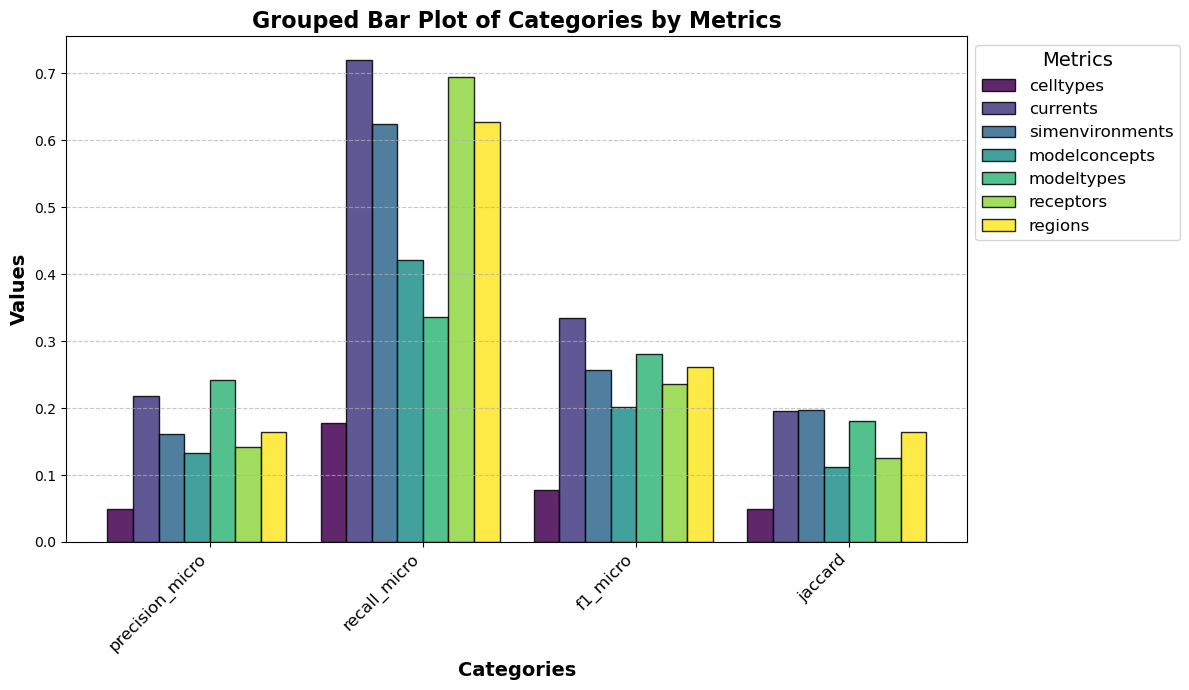

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(df.index))  # Label locations
width = 0.12  # Width of the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)-1))  # Generate colors

# Plot each metric with distinct colors
for i, (col, color) in enumerate(zip(df.columns[1:], colors)):
    ax.bar(x + i * width, df[col], width, label=col, color=color, edgecolor='black', alpha=0.85)

# Formatting the plot
ax.set_xlabel("Categories", fontsize=14, fontweight='bold')
ax.set_ylabel("Values", fontsize=14, fontweight='bold')
ax.set_title("Grouped Bar Plot of Categories by Metrics", fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(df.columns) - 1) / 2)
ax.set_xticklabels(df['metrics'], rotation=45, ha='right', fontsize=12)
ax.legend(title="Metrics", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()